In [1]:
import os

os.makedirs("Lab_2.1/output", exist_ok=True)
print("Output folder created successfully!")

Output folder created successfully!


In [2]:
!pip install tensorflow opencv-python matplotlib

Normal loaded: True
Pneumonia loaded: True


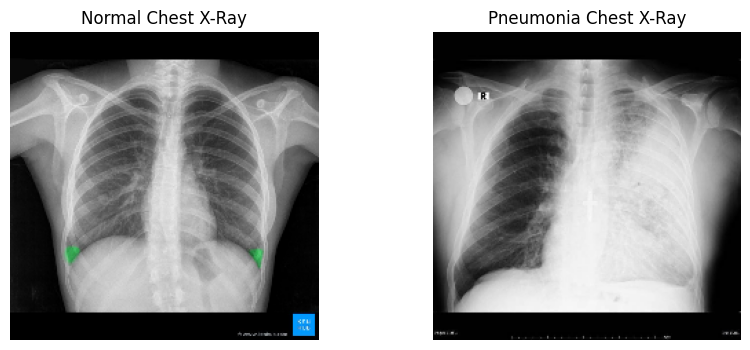

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input


normal_file = "normal.png"
pneumonia_file = "pneumonia.jpg"


normal_img = cv2.imread(normal_file)
pneumonia_img = cv2.imread(pneumonia_file)

print("Normal loaded:", normal_img is not None)
print("Pneumonia loaded:", pneumonia_img is not None)


normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2RGB)
pneumonia_img = cv2.cvtColor(pneumonia_img, cv2.COLOR_BGR2RGB)


normal_img = cv2.resize(normal_img, (224, 224))
pneumonia_img = cv2.resize(pneumonia_img, (224, 224))


plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(normal_img)
plt.title("Normal Chest X-Ray")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(pneumonia_img)
plt.title("Pneumonia Chest X-Ray")
plt.axis("off")

plt.show()


normal_array = preprocess_input(np.expand_dims(normal_img, axis=0))
pneumonia_array = preprocess_input(np.expand_dims(pneumonia_img, axis=0))

In [5]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load pre-trained VGG16
base_model = VGG16(weights='imagenet', include_top=False)

# Show model summary (required in lab)
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:

layer_names = ['block1_conv1', 'block3_conv3', 'block5_conv3']

outputs = [base_model.get_layer(name).output for name in layer_names]
feature_model = Model(inputs=base_model.input, outputs=outputs)

print("Feature extraction model ready!")

Feature extraction model ready!


In [7]:
# Extract features for both X-rays
normal_features = feature_model.predict(normal_array)
pneumonia_features = feature_model.predict(pneumonia_array)

print("Feature maps extracted successfully!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
Feature maps extracted successfully!


In [8]:
import os
os.makedirs("Lab_2.1/output", exist_ok=True)

output_folder = "Lab_2.1/output"

# Save Normal X-ray feature maps
for i, fmap in enumerate(normal_features):
    plt.figure(figsize=(8,8))
    for j in range(16):
        plt.subplot(4,4,j+1)
        plt.imshow(fmap[0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.savefig(f"{output_folder}/normal_xray_layer_{i+1}.png")
    plt.close()

# Save Pneumonia X-ray feature maps
for i, fmap in enumerate(pneumonia_features):
    plt.figure(figsize=(8,8))
    for j in range(16):
        plt.subplot(4,4,j+1)
        plt.imshow(fmap[0, :, :, j], cmap='viridis')
        plt.axis('off')
    plt.savefig(f"{output_folder}/pneumonia_xray_layer_{i+1}.png")
    plt.close()

print("Correct X-ray outputs saved in Lab_2.1/output folder!")

Correct X-ray outputs saved in Lab_2.1/output folder!


In [9]:
print("""
Lab 2.1 (Corrected Submission):
I re-ran the CNN layer visualization using chest X-ray images of patients with and without pneumonia as instructed.
The early layers detected edges and lung boundaries, the middle layers captured texture variations in lung regions,
and the deeper layers highlighted complex patterns associated with pneumonia compared to normal lungs.
""")


Lab 2.1 (Corrected Submission):
I re-ran the CNN layer visualization using chest X-ray images of patients with and without pneumonia as instructed.
The early layers detected edges and lung boundaries, the middle layers captured texture variations in lung regions,
and the deeper layers highlighted complex patterns associated with pneumonia compared to normal lungs.



In [10]:
!zip -r Lab_2.1_Updated.zip Lab_2.1

  adding: Lab_2.1/ (stored 0%)
  adding: Lab_2.1/output/ (stored 0%)
  adding: Lab_2.1/output/normal_xray_layer_3.png (deflated 64%)
  adding: Lab_2.1/output/pneumonia_xray_layer_2.png (deflated 2%)
  adding: Lab_2.1/output/pneumonia_xray_layer_1.png (deflated 1%)
  adding: Lab_2.1/output/pneumonia_xray_layer_3.png (deflated 70%)
  adding: Lab_2.1/output/normal_xray_layer_2.png (deflated 2%)
  adding: Lab_2.1/output/normal_xray_layer_1.png (deflated 1%)
